# <b># PA 1: Exploratory Analysis over Artists Dataset</b>

## Student Details

Student Name and ID: 
<b> Bhogal, Gurvir Singh Tarlok Singh 1001769871</b>
<b>, Rohith Rajagopalan Ramesh Babu 1001518031 </b>

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Artists dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work Artists dataset. Specifically, you will work on artists.csv file from kaggle repository (https://www.kaggle.com/revilrosa/music-label-dataset?select=artists.csv). The file artists.csv contains 50,000 rows and 9 columns. Each row corresponds to an artwork created by an artist/rapper/singer etc. who are located all around the US. The columns of the data-set are:
- id - Unique number for each artwork declared
- real_name - Name of the artist
- art_name - Name of the art work
- role - Role of the artist
- year_of_birth - The year artist is born in
- country - place of the artist 
- city - city of the artist 
- email - artist's email
- zip_code - Zip code of their place



## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [9]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

<b># Reading Dataset</b>

The Python code below reads the Artists dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'artists.csv' must be in the same folder as this file.

In [10]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('artists.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,id,real_name,art_name,role,year_of_birth,country,city,email,zip_code
0,1,Kameko Nelson,NaN,female voice,1981,Slovenia,Vedrin,lorem.tristique.aliquet@nonummyFusce.co.uk,6914
1,2,Sacha Cameron,Bianco Ibureno Chloride,artist,1955,Guernsey,Montigny-le-Tilleul,Sed@elementum.com,0568
2,3,Thane E. Oliver,NaN,rapper,1993,Guinea-Bissau,Saint-SÃ©bastien-sur-Loire,Integer.tincidunt.aliquam@libero.com,813154
3,4,Cole E. Joseph,Persian responsible,bassist,1994,Estonia,Newquay,nulla.magna.malesuada@vulputate.com,A4S 2B3
4,5,Sonia U. Jensen,Asleep lonely Big Morgan,DJ,1988,Vanuatu,Dudzele,faucibus@euismodetcommodo.edu,46418


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [11]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.
#Reference [1]

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n")
print(df_data.info())

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Year of Birth' column of the df_data 
print ("\n\n>>Task 1-c: Descriptive details of 'Year of Birth' column are\n")
print("The Count of the 'Year of Birth' Column is:\n\n", df_data["year_of_birth"].value_counts()) #count
print("\n\n The unique values are:", df_data["year_of_birth"].unique()) #unique
print("\n\n The Top Value is:", df_data["year_of_birth"].value_counts().idxmax()) #top value
print("\n\n The frequence is:", df_data["year_of_birth"].value_counts().max()) #freq

# 10 points
#Task 1-d: Print ALL the unique values of role and Countries  .
role_list  = df_data["role"].unique() #unique role
unique_country_list = df_data["country"].unique() #unique country

print ("\n\n >>Task 1-d:")
print(role_list)
print("#####################################################")
print(unique_country_list) 



>>Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
id               50000 non-null int64
real_name        50000 non-null object
art_name         33291 non-null object
role             50000 non-null object
year_of_birth    50000 non-null int64
country          50000 non-null object
city             50000 non-null object
email            50000 non-null object
zip_code         50000 non-null object
dtypes: int64(2), object(7)
memory usage: 3.4+ MB
None


>>Task 1-b: Number of rows:50000 and number of columns:9


>>Task 1-c: Descriptive details of 'Year of Birth' column are

The Count of the 'Year of Birth' Column is:

 1966    1162
1982    1156
1989    1149
1999    1135
1987    1135
1975    1125
1960    1124
1971    1112
1976    1110
1963    1109
1985    1107
1974    1101
1978    1100
1979    1099
1988    1099
1961    1098
1972    1096
1980    1093
1996    1092
1981    1089
1962    1

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [8]:
# 8 points
#Task 2-a: Print the details of pianists and violinists from Brazil 
#Reference [1]

artists_from_brazil = df_data.loc[(df_data['role'] == "pianist")  & (df_data['country'] == "Brazil") | (df_data['role'] == "violinist")  & (df_data['country'] == "Brazil") ]
print (">>Task 2-a: The details of 'pianist' and 'violinist' from Brazil are\n %s" 
      % (artists_from_brazil))

# 8 points
#Task 2-b: Find out the total number of arts made by artists born between 1958 and 1972.


arts_made_1958_1972 = df_data.loc[(df_data['year_of_birth'] >=1958)  & (df_data['year_of_birth'] <= 1972)].count()[1]
print ("\n\n>>Task 2-b: The total number of arts made by artists from 1958-1972 were %s" 
       % (arts_made_1958_1972))

# 14 points
#Task 2-c: Find out the top 5 countries with roles 'artist' and 'guitarist'.
n = 5
top5_artist = df_data.loc[(df_data['role'] == "artist")]['country'].value_counts().head()
top5_guitarist= df_data.loc[(df_data['role'] == "guitarist")]['country'].value_counts().head()
print ("\n\n>>Task 2-c: top 5 countries with artists: \n%s" % (top5_artist))
print ("\n\n>>Task 2-c: top 5 counties with guitarists: \n%s" % (top5_guitarist))




>>Task 2-a: The details of 'pianist' and 'violinist' from Brazil are
           id             real_name                           art_name  \
1255    1256        Ulla J. Guzman                                NaN   
5264    5265       Quintessa Weeks                 Strong Friday Clam   
6645    6646     Mohammad W. Gould                            Manager   
6676    6677          Jonah Chavez  Destinee Slovakia Emon Firewalker   
7312    7313       Timothy E. Park                                NaN   
9912    9913      Herman W. Fisher           Loestrin 24 Kierra Indas   
10005  10006      Christine Cannon                                NaN   
10499  10500    Griffith W. Steele             Carly Wildface Maximus   
10708  10709         Hamish Baxter                                NaN   
10777  10778    Iliana N. Shepherd                                NaN   
11054  11055      Larissa X. Ayers                            Harriea   
17589  17590        Shafira Jordan                    

# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have assigned 10 points for the aesthetics of your visualizations.

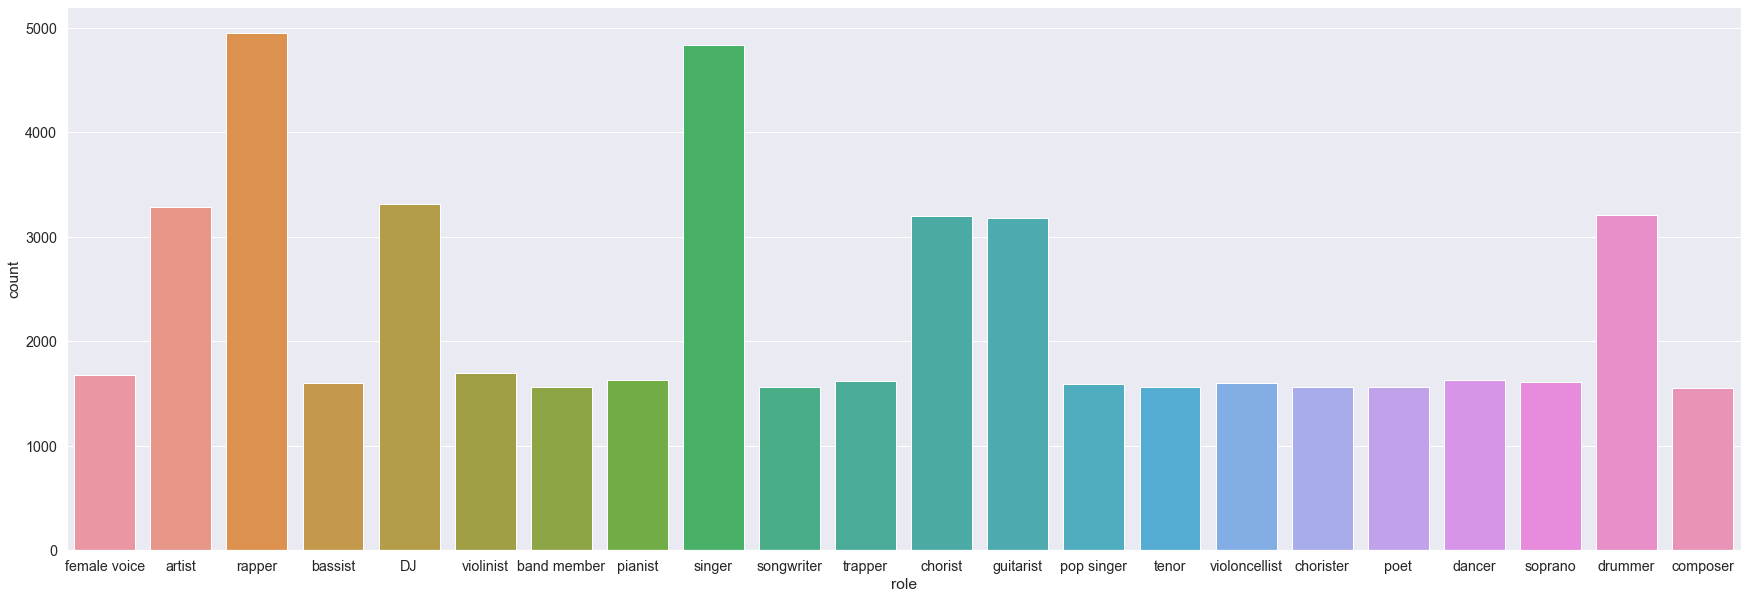

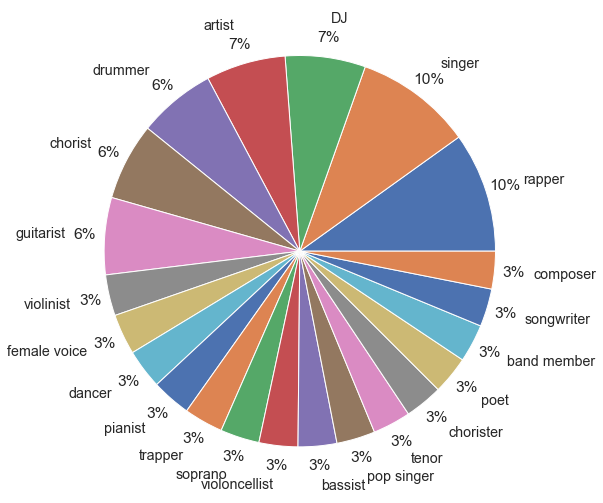

In [14]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 10 points
# Task 3-a: Plot the count for each role . 
# Think of a way to nicely visualize all the roles! 
#########################begin code for Task 3-a
plt.figure(figsize=(30,10))
sns.countplot(x="role",data=df_data)
#########################end code for Task 3-a

# 20 points
# Task 3-b: Draw a pie chart that represents each role.
#########################begin code for Task 3-b 
#reference [3]
d1 = df_data['role'].value_counts().values
l = df_data['role'].value_counts().index
plt.figure(figsize=(9,9))
plt.pie(d1,labels=l ,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()
#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

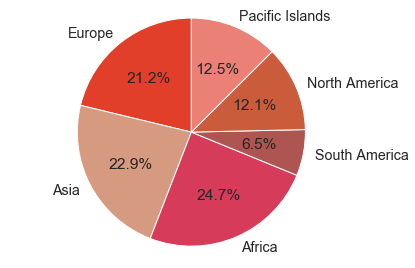

In [13]:
#########################begin code for Task 4
### reference [3]

Europe=df_data[(df_data['country'].str.match('United Kingdom (Great Britain)')) | (df_data['country'].str.match('Russian Federation')) | (df_data['country'].str.match('Germany')) | (df_data['country'].str.match('France')) | (df_data['country'].str.match('Italy')) | (df_data['country'].str.match('Spain')) | (df_data['country'].str.match('Ukraine')) | (df_data['country'].str.match('Poland')) | (df_data['country'].str.match('Romania')) | (df_data['country'].str.match('Netherlands')) | (df_data['country'].str.match('Belgium')) | (df_data['country'].str.match('Czech Republic')) | (df_data['country'].str.match('Greece')) | (df_data['country'].str.match('Portugal')) | (df_data['country'].str.match('Sweden')) | (df_data['country'].str.match('Hungary')) | (df_data['country'].str.match('Belarus')) | (df_data['country'].str.match('Austria')) | (df_data['country'].str.match('Serbia')) | (df_data['country'].str.match('Switzerland')) | (df_data['country'].str.match('Bulgaria')) | (df_data['country'].str.match('Denmark')) | (df_data['country'].str.match('Finland')) | (df_data['country'].str.match('Slovakia')) | (df_data['country'].str.match('Norway')) | (df_data['country'].str.match('Ireland')) | (df_data['country'].str.match('Croatia')) | (df_data['country'].str.match('Moldova')) | (df_data['country'].str.match('Albania')) | (df_data['country'].str.match('Lithuania')) | (df_data['country'].str.match('North Macedonia')) | (df_data['country'].str.match('Slovenia')) | (df_data['country'].str.match('Latvia')) | (df_data['country'].str.match('Estonia'))| (df_data['country'].str.match('Montenegro')) | (df_data['country'].str.match('Luxembourg')) | (df_data['country'].str.match('Malta')) | (df_data['country'].str.match('Iceland')) | (df_data['country'].str.match('Andorra')) | (df_data['country'].str.match('Monaco')) | (df_data['country'].str.match('Liechtenstein')) | (df_data['country'].str.match('San Marino'))| (df_data['country'].str.match('Holy See'))]
Europe_count=len(Europe)
Asia=df_data[(df_data['country'].str.match('Afghanistan')) | (df_data['country'].str.match('Armenia')) | (df_data['country'].str.match('Azerbaijan')) | (df_data['country'].str.match('Bahrain')) | (df_data['country'].str.match('Bangladesh')) | (df_data['country'].str.match('Bhutan')) | (df_data['country'].str.match('Brunei')) | (df_data['country'].str.match('China')) | (df_data['country'].str.match('India')) | (df_data['country'].str.match('Indonesia')) | (df_data['country'].str.match('Pakistan')) | (df_data['country'].str.match('Japan')) | (df_data['country'].str.match('Philippines')) | (df_data['country'].str.match('Vietnam')) | (df_data['country'].str.match('Turkey')) | (df_data['country'].str.match('Iran')) | (df_data['country'].str.match('Thailand')) | (df_data['country'].str.match('Myanmar')) | (df_data['country'].str.match('South Korea')) | (df_data['country'].str.match('Iraq')) | (df_data['country'].str.match('Afghanistan')) | (df_data['country'].str.match('Saudi Arabia')) | (df_data['country'].str.match('Uzbekistan')) | (df_data['country'].str.match('Malaysia')) | (df_data['country'].str.match('Yemen')) | (df_data['country'].str.match('Nepal')) | (df_data['country'].str.match('North Korea')) | (df_data['country'].str.match('Sri Lanka')) | (df_data['country'].str.match('Kazakhstan')) | (df_data['country'].str.match('Syria')) | (df_data['country'].str.match('Cambodia')) | (df_data['country'].str.match('Jordan')) | (df_data['country'].str.match('Azerbaijan')) | (df_data['country'].str.match('United Arab Emirates'))| (df_data['country'].str.match('Tajikistan')) | (df_data['country'].str.match('Israel')) | (df_data['country'].str.match('Laos')) | (df_data['country'].str.match('Lebanon')) | (df_data['country'].str.match('Kyrgyzstan')) | (df_data['country'].str.match('Turkmenistan')) | (df_data['country'].str.match('Singapore')) | (df_data['country'].str.match('Oman'))| (df_data['country'].str.match('Palestine')) | (df_data['country'].str.match('Georgia')) | (df_data['country'].str.match('Kuwait')) | (df_data['country'].str.match('Mongolia')) | (df_data['country'].str.match('Qatar')) | (df_data['country'].str.match('Bahrain')) | (df_data['country'].str.match('Cyprus')) | (df_data['country'].str.match('Maldives')) | (df_data['country'].str.match('Brunei')) ]
Asia_count=len(Asia)
Africa=df_data[(df_data['country'].str.match('Algeria')) | (df_data['country'].str.match('Angola')) | (df_data['country'].str.match('Benin')) | (df_data['country'].str.match('Burundi')) | (df_data['country'].str.match('Cameroon')) | (df_data['country'].str.match('Comoros')) | (df_data['country'].str.match('Chad')) | (df_data['country'].str.match('Congo')) | (df_data['country'].str.match('Egypt')) | (df_data['country'].str.match('Equator')) | (df_data['country'].str.match('Eritrea')) | (df_data['country'].str.match('Ethiopia')) | (df_data['country'].str.match('Gabon')) | (df_data['country'].str.match('Gambia')) | (df_data['country'].str.match('Ghana')) | (df_data['country'].str.match('Guinea')) | (df_data['country'].str.match('Kenya')) | (df_data['country'].str.match('Lesotho')) | (df_data['country'].str.match('Liberia')) | (df_data['country'].str.match('Libya')) | (df_data['country'].str.match('Madagascar')) | (df_data['country'].str.match('Malawi')) | (df_data['country'].str.match('Mali')) | (df_data['country'].str.match('Mauritania')) | (df_data['country'].str.match('Mauritius')) | (df_data['country'].str.match('Morocco')) | (df_data['country'].str.match('Mozambique')) | (df_data['country'].str.match('Namibia')) | (df_data['country'].str.match('Niger')) | (df_data['country'].str.match('Nigeria')) | (df_data['country'].str.match('Rwanda')) | (df_data['country'].str.match('Senegal')) | (df_data['country'].str.match('Seychelles')) | (df_data['country'].str.match('Somalia'))| (df_data['country'].str.match('South Africa')) | (df_data['country'].str.match('South Sudan')) | (df_data['country'].str.match('Sudan')) | (df_data['country'].str.match('Tanzania')) | (df_data['country'].str.match('Togo')) | (df_data['country'].str.match('Tunisia')) | (df_data['country'].str.match('Uganda')) | (df_data['country'].str.match('Zambia'))| (df_data['country'].str.match('Zimbabwe')) ]
Africa_count=len(Africa)
South_America=df_data[(df_data['country'].str.match('Argentina')) | (df_data['country'].str.match('Bolivia')) | (df_data['country'].str.match('Brazil')) | (df_data['country'].str.match('Chile')) | (df_data['country'].str.match('Colombia')) | (df_data['country'].str.match('Ecuador')) | (df_data['country'].str.match('Guyana')) | (df_data['country'].str.match('Paraguay')) | (df_data['country'].str.match('Peru')) | (df_data['country'].str.match('Suriname')) | (df_data['country'].str.match('Uruguay')) | (df_data['country'].str.match('Venezuela'))]
South_America_count=len(South_America)
South_America_count
North_America=df_data[(df_data['country'].str.match('Antigua')) | (df_data['country'].str.match('Barbuda')) | (df_data['country'].str.match('Bahamas')) | (df_data['country'].str.match('Barbados')) | (df_data['country'].str.match('Belize')) | (df_data['country'].str.match('Canada')) | (df_data['country'].str.match('Costa Rica')) | (df_data['country'].str.match('Cuba')) | (df_data['country'].str.match('Dominica')) | (df_data['country'].str.match('Dominican Republic')) | (df_data['country'].str.match('El Salvador')) | (df_data['country'].str.match('Grenada')) | (df_data['country'].str.match('Guatemala')) | (df_data['country'].str.match('Haiti')) | (df_data['country'].str.match('Honduras')) | (df_data['country'].str.match('Jamaica')) | (df_data['country'].str.match('Mexico')) | (df_data['country'].str.match('Nicaragua')) | (df_data['country'].str.match('Panama')) | (df_data['country'].str.match('Saint Kitts')) | (df_data['country'].str.match('Nevis')) | (df_data['country'].str.match('Saint Lucia')) | (df_data['country'].str.match('Trinidad')) | (df_data['country'].str.match('Tobago')) | (df_data['country'].str.match('Saint Vincent')) | (df_data['country'].str.match('Grenadines')) | (df_data['country'].str.match('United States of America')) | (df_data['country'].str.match('USA')) ]
North_America_count=len(North_America)
Pacific_islands=df_data[(df_data['country'].str.match('Australia')) | (df_data['country'].str.match('Fiji')) | (df_data['country'].str.match('Kiribati')) | (df_data['country'].str.match('Marshall Islands')) | (df_data['country'].str.match('Micronesia')) | (df_data['country'].str.match('Nauru')) | (df_data['country'].str.match('New Zealand')) | (df_data['country'].str.match('Palau')) | (df_data['country'].str.match('Papua New Guinea')) | (df_data['country'].str.match('Samoa')) | (df_data['country'].str.match('Solomon Islands')) | (df_data['country'].str.match('Tonga')) | (df_data['country'].str.match('Tuvalu')) | (df_data['country'].str.match('Vanuatu')) | (df_data['country'].str.match('Honduras')) | (df_data['country'].str.match('Jamaica')) | (df_data['country'].str.match('Mexico')) | (df_data['country'].str.match('Nicaragua')) | (df_data['country'].str.match('Panama')) | (df_data['country'].str.match('Saint Kitts')) | (df_data['country'].str.match('Nevis')) | (df_data['country'].str.match('Saint Lucia')) | (df_data['country'].str.match('Trinidad')) | (df_data['country'].str.match('Tobago')) | (df_data['country'].str.match('Saint Vincent')) | (df_data['country'].str.match('Grenadines')) | (df_data['country'].str.match('United States of America')) | (df_data['country'].str.match('USA')) ]
Pacific_islands_count=len(Pacific_islands)
Pacific_islands_count
Total_Guitar=len(df_data[df_data['role'].str.match('guitarist')])
Europe_Guitar=len(Europe[Europe['role'].str.match('guitarist')])
Asia_Guitar=len(Asia[Asia['role'].str.match('guitarist')])
Africa_Guitar=len(Africa[Africa['role'].str.match('guitarist')])
South_America_Guitar=len(South_America[South_America['role'].str.match('guitarist')])
North_America_Guitar=len(North_America[North_America['role'].str.match('guitarist')])
Pacific_islands_Guitar=len(Pacific_islands[Pacific_islands['role'].str.match('guitarist')])
ES=(Europe_Guitar/Total_Guitar)*100
AS=(Asia_Guitar/Total_Guitar)*100
AFS=(Africa_Guitar/Total_Guitar)*100
SG=(South_America_Guitar/Total_Guitar)*100
NG=(North_America_Guitar/Total_Guitar)*100
PG=(Pacific_islands_Guitar/Total_Guitar)*100
Guitarists=pd.DataFrame(columns=['Region','Percentage'])
Guitarists['Region']=["Europe",'Asia','Africa','South America','North America','Pacific Islands']
Guitarists['Percentage']=[ES,AS,AFS,SG,NG,PG]


colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
plt.pie(Guitarists["Percentage"],labels=Guitarists["Region"],shadow=False,colors=colors,startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()


### we have taken the guitarists from diffrent regions and calculated the percentage according to the continent they orginate from
### Observation- It is found that the maximum number of guitarists orginate from Africa, followed by Asia and Europe. 


#########################end code for Task 4

## Observations
<p>The trend of each declaration with time will give the information about the rate at with each declaration got changed in the given period (1953 - 2017)</p>

<p>The trend of Disasters from 1953 to 2017 has rapidly increased and recorded highest in the year 2017 and according to the trend we predict that it can further increase in the future.</p>

<p>The trend of Emergency has increased gradually for last 63 years</p> 

<p>The trend of Fire decreased at a slow pace. The Count of fires recorded least in the year 2012</p>

# Task 5:

Use Weka to 
1) Find out how to convert the used dataset in weka format 
2) Convert it 
3) use the weka visualizer to produce some graphs.

In [1]:
# 20 point
#########################begin code for Task 5
#Reference [2]
#1)
# WE used the java command to convert .csv file to .arff file the command is as follows and was run on a ubuntu machine
# java -cp /home/gurvir/Desktop/weka-3-8-4/weka.jar weka.core.converters.CSVLoader artists.csv > a1.arff -B 50000 
# Hence we get the output file as a1.arff
# The output file and weka visualizer graphs are attched in the folder
#2) Converted file is attached in the Bhogal_9871_PA1 folder 
#3) Graphs are attached in the Bhogal_9871_PA1/weka screenshots folder

#########################end code for Task 5

# REFERENCES

[1] Reference for pandas command, link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html <br/>
[2] Reference for java stack overflow command, link: https://stackoverflow.com/questions/10341701/convert-csv-to-arff-using-weka#:~:text=8%20Answers&text=You%20can%20also%20use%20the,should%20be%20selected%20by%20default). <br/>
[3] Pie chart for MatPlotLib, link: https://chrisalbon.com/python/data_visualization/matplotlib_pie_chart/